In [10]:
import pandas as pd
import torch
from train import load_checkpoint
import data_process as dp
torch.__version__

'2.2.1'

In [2]:
model, _ = load_checkpoint("./")

In [3]:
model

GPT(
  (token_embedding_table): Embedding(20, 256)
  (position_embedding_table): Embedding(128, 256)
  (blocks): Sequential(
    (0): Block(
      (ln_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=256, out_features=768, bias=False)
        (c_proj): Linear(in_features=256, out_features=256, bias=False)
        (attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_dropout): Dropout(p=0.0, inplace=False)
      )
      (ln_2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=256, out_features=1024, bias=False)
        (1): ReLU()
        (2): Linear(in_features=1024, out_features=256, bias=False)
        (3): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (ln_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=256, out_features=768, bias=False

In [4]:
df = pd.read_csv("./data-venome.csv")

In [5]:
df

,name,3Di
0,Gh_comp10207_c0_seq2.pdb,DWFQVLCVPHDQQLFWFWQDDPDDPVPTDTWGFPDKDADPQWDDCV...
1,Gh_comp1045_c0_seq1.pdb,DLQLQQDAQVVLLVVLVADLQQWAAPVSLVVQCVVAPWQAADDDDD...
2,Gh_comp10466_c0_seq1.pdb,DVVVVVVDDLVRNLVVVVVCCVVVVVVLVVPDDDDPLVVVVVVVVV...
3,Gh_comp1063_c0_seq1.pdb,DQFDFPVQLLPDPDPVSLVVSDDPPGDFDPDFFFAEEEEAAPQQQA...
4,Gh_comp1068_c0_seq5.pdb,DPPPDPDPPDQPDQDLQFDDDPVVLVVLLPDDDDQVFWWWAADPFQ...
...,...,...
381,Lh14_comp82_c1_seq1.pdb,DVVVVVVVVVVVVVLCVQAVQDPVLLVVLVVLLVVLLVVLLVVQPP...
382,Lh14_comp82_c1_seq3.pdb,DVPPLVPPDPPDDDDDDQPADDPVLLVLLVVLLVCLLVVLCVQCVP...
383,Lh14_comp835_c0_seq1.pdb,DDFFDFDDQDWFQWLVGIDGCLVVLAQAKEKEWEAFDFPDDLVLVQ...
384,Lh14_comp862_c0_seq1.pdb,DPPPVVVVVVVVVVVVVVLVVVQVVVVVAPPPDDDDDDDDDDDDDD...


In [14]:
with torch.no_grad():
	res = []
	for repr, name in zip(df["3Di"], df["name"]):
		seq = torch.tensor([dp.encode(repr)], dtype=torch.long)
		embeddings = model.seq_embeddings(seq)
		res.append(embeddings)
	print(torch.cat(res).shape)

torch.Size([1380, 256])


In [15]:
torch.cat(res)

tensor([[ 0.3856,  0.1871,  0.2580,  ...,  0.8045, -3.3757,  1.5251],
        [-0.4133, -4.1629, -0.9723,  ...,  6.2019,  2.4561,  0.0379],
        [ 5.8459, -1.3650, -2.1234,  ...,  0.8925,  2.4751, -1.3219],
        ...,
        [-3.9796, -0.1604,  2.8573,  ..., -1.9176,  1.2128, -1.5854],
        [ 1.1062, -1.6877, -0.3442,  ...,  2.6438,  3.5260,  1.7665],
        [-2.3595,  3.0622,  0.0246,  ...,  2.0448,  1.3783,  1.8101]])

In [16]:
import umap

mapper = umap.UMAP()

/usr/local/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [19]:
embed2D = mapper.fit_transform(torch.cat(res))

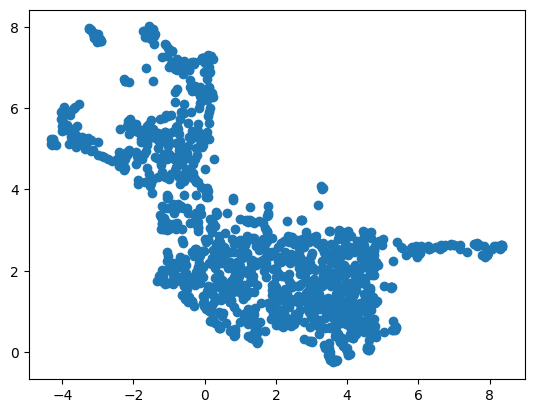

In [20]:
import matplotlib.pyplot as plt
plt.scatter(embed2D[:, 0], embed2D[:, 1])

In [23]:
with torch.no_grad():
	res = []
	for repr, name in zip(df["3Di"], df["name"]):
		seq = torch.tensor([dp.encode(repr)], dtype=torch.long)
		embeddings = model.seq_embeddings(seq)
		embeddings = embeddings.mean(0)
		res.append(embeddings)
		

256


In [25]:
avg = torch.stack(res)
avg.shape

torch.Size([386, 256])

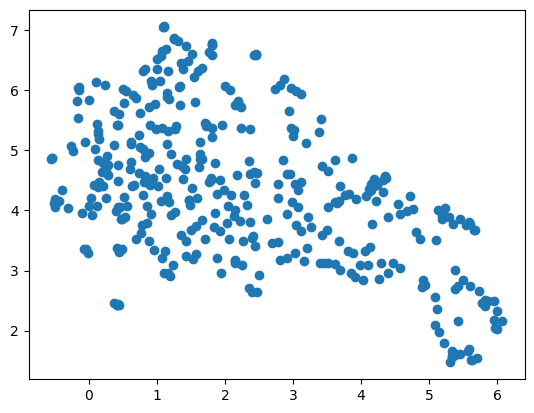

In [26]:
embed2D = mapper.fit_transform(avg)
plt.scatter(embed2D[:, 0], embed2D[:, 1])